<a href="https://colab.research.google.com/github/PuruBehl/Task-1-Linear-Regression-/blob/main/student_score_prediction_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

# Importing the required packages

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression,LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNetCV
from sklearn.svm import LinearSVR 
warnings.filterwarnings("ignore")

# Importing the data

In [ ]:
data=pd.read_csv('../input/student-data-personalized/student_scores%20-%20student_scores.csv')

In [ ]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Having a look at the score distribution of the students 


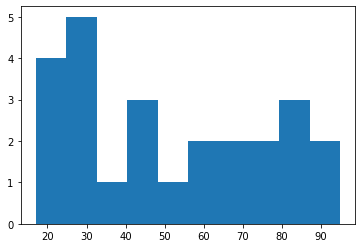

In [ ]:
# Having a look at the score distribution of the students 
plt.hist(data['Scores'])
plt.show()

# Having a look at the hours distribution of the students 


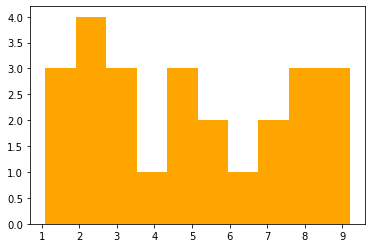

In [ ]:
# Having a look at the hours distribution of the students 
plt.hist(data['Hours'],color='orange')
plt.show()

# Relationship between hours and Scores

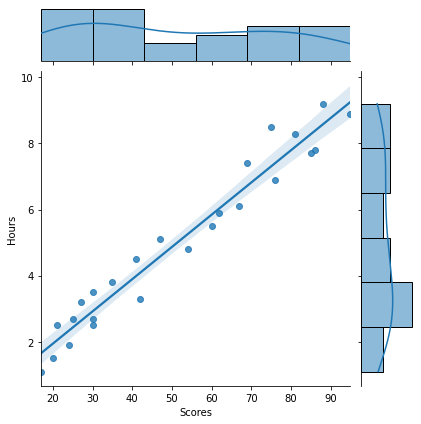

In [ ]:
sns.jointplot(data['Scores'],data['Hours'],kind='reg')
plt.show()

# TRain test split of the data

In [ ]:
# Using different models
# Using linear Regression
X=data[['Hours']]
y=data['Scores']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Linear Regression Model

In [ ]:
# Linear Regression
lr=LinearRegression()
lr.fit(X_train,y_train)
print('The MSE of the model is :',mean_absolute_error(lr.predict(X_test),y_test))

The MSE of the model is : 5.632881746692994


# Logistic Regression Model

In [ ]:
# Using logistic Regression Here
lg=LogisticRegression()
lg.fit(X_train,y_train)
print('The MSE of the model is :',mean_absolute_error(lg.predict(X_test),y_test))

The MSE of the model is : 10.6


# Elastic Net Model

In [ ]:
# TRying elastic net with tuned parameters
best_params={'l1_ratio': 0.17528362757966653,
  'eps': 0.0020815171035780482,
  'n_alphas': 135,
  'tol': 0.0015152265987442687,
  'cv': 10}
elastic=ElasticNetCV(**best_params)
elastic.fit(X_train,y_train)
print('The MSE of the model is :',mean_absolute_error(elastic.predict(X_test),y_test))

The MSE of the model is : 5.487952693964656


# Linear SVR Model

In [ ]:
# Trying out the SVr model
best_params={'epsilon': 0.8399680021600182,
  'tol': 0.004787517234436603,
  'C': 0.5850448870234743,
  'loss': 'epsilon_insensitive'}
svr=LinearSVR(**best_params)
svr.fit(X_train,y_train)
print('The MSE of the model is :',mean_absolute_error(svr.predict(X_test),y_test))

The MSE of the model is : 5.193533341849296


## The best model we used was svr which is giving us an MAE of 5.03 . LEt's use this to predict the score for the student with 9.25 hours a day .

In [ ]:
svr.predict([[9.25]])

array([90.93558876])

# So the student with 9.25 hours/day will get a score of 91